198935
uminusr Johnson fit : 0.9367572830922959 3.1154721663388947 2.2027773027228856 1.2735733390015367
uminusr BoxCox lamda 0.8984855626498378 Confidence Interval (0.8859659505431315, 0.9105308353893857)
uminusr Normal fit : 0.7638452053070068 0.42543619871139526
Need to print normal tests before & after


/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_33560/1388583386.py:65: RuntimeWarning: invalid value encountered in power
  yn1 = xn**lamda-1/lamda
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_33560/1388583386.py:66: RuntimeWarning: invalid value encountered in power
  yn2 = (lamda / xn**lamda-1)


logmstar Johnson fit : 1.2461601046055137 1.243482879991698 11.100999293475756 0.4675429016554018
logmstar BoxCox lamda 5.417724719746884 Confidence Inteval (5.379007789526558, 5.4485404491431595)
logmstar Normal fit : 62262.765625 20175.20703125
Need to print normal tests before & after
metal Johnson fit : -0.5593079891022714 1.2939644883710881 0.009016763051473167 0.003422586829498994
metal BoxCox lamda 0.19341173341294463 Confidenc Interval (0.18721286207442586, 0.19897276908199302)
metal Normal fit : -3.0266432762145996 0.15401703119277954
Need to print normal tests before & after


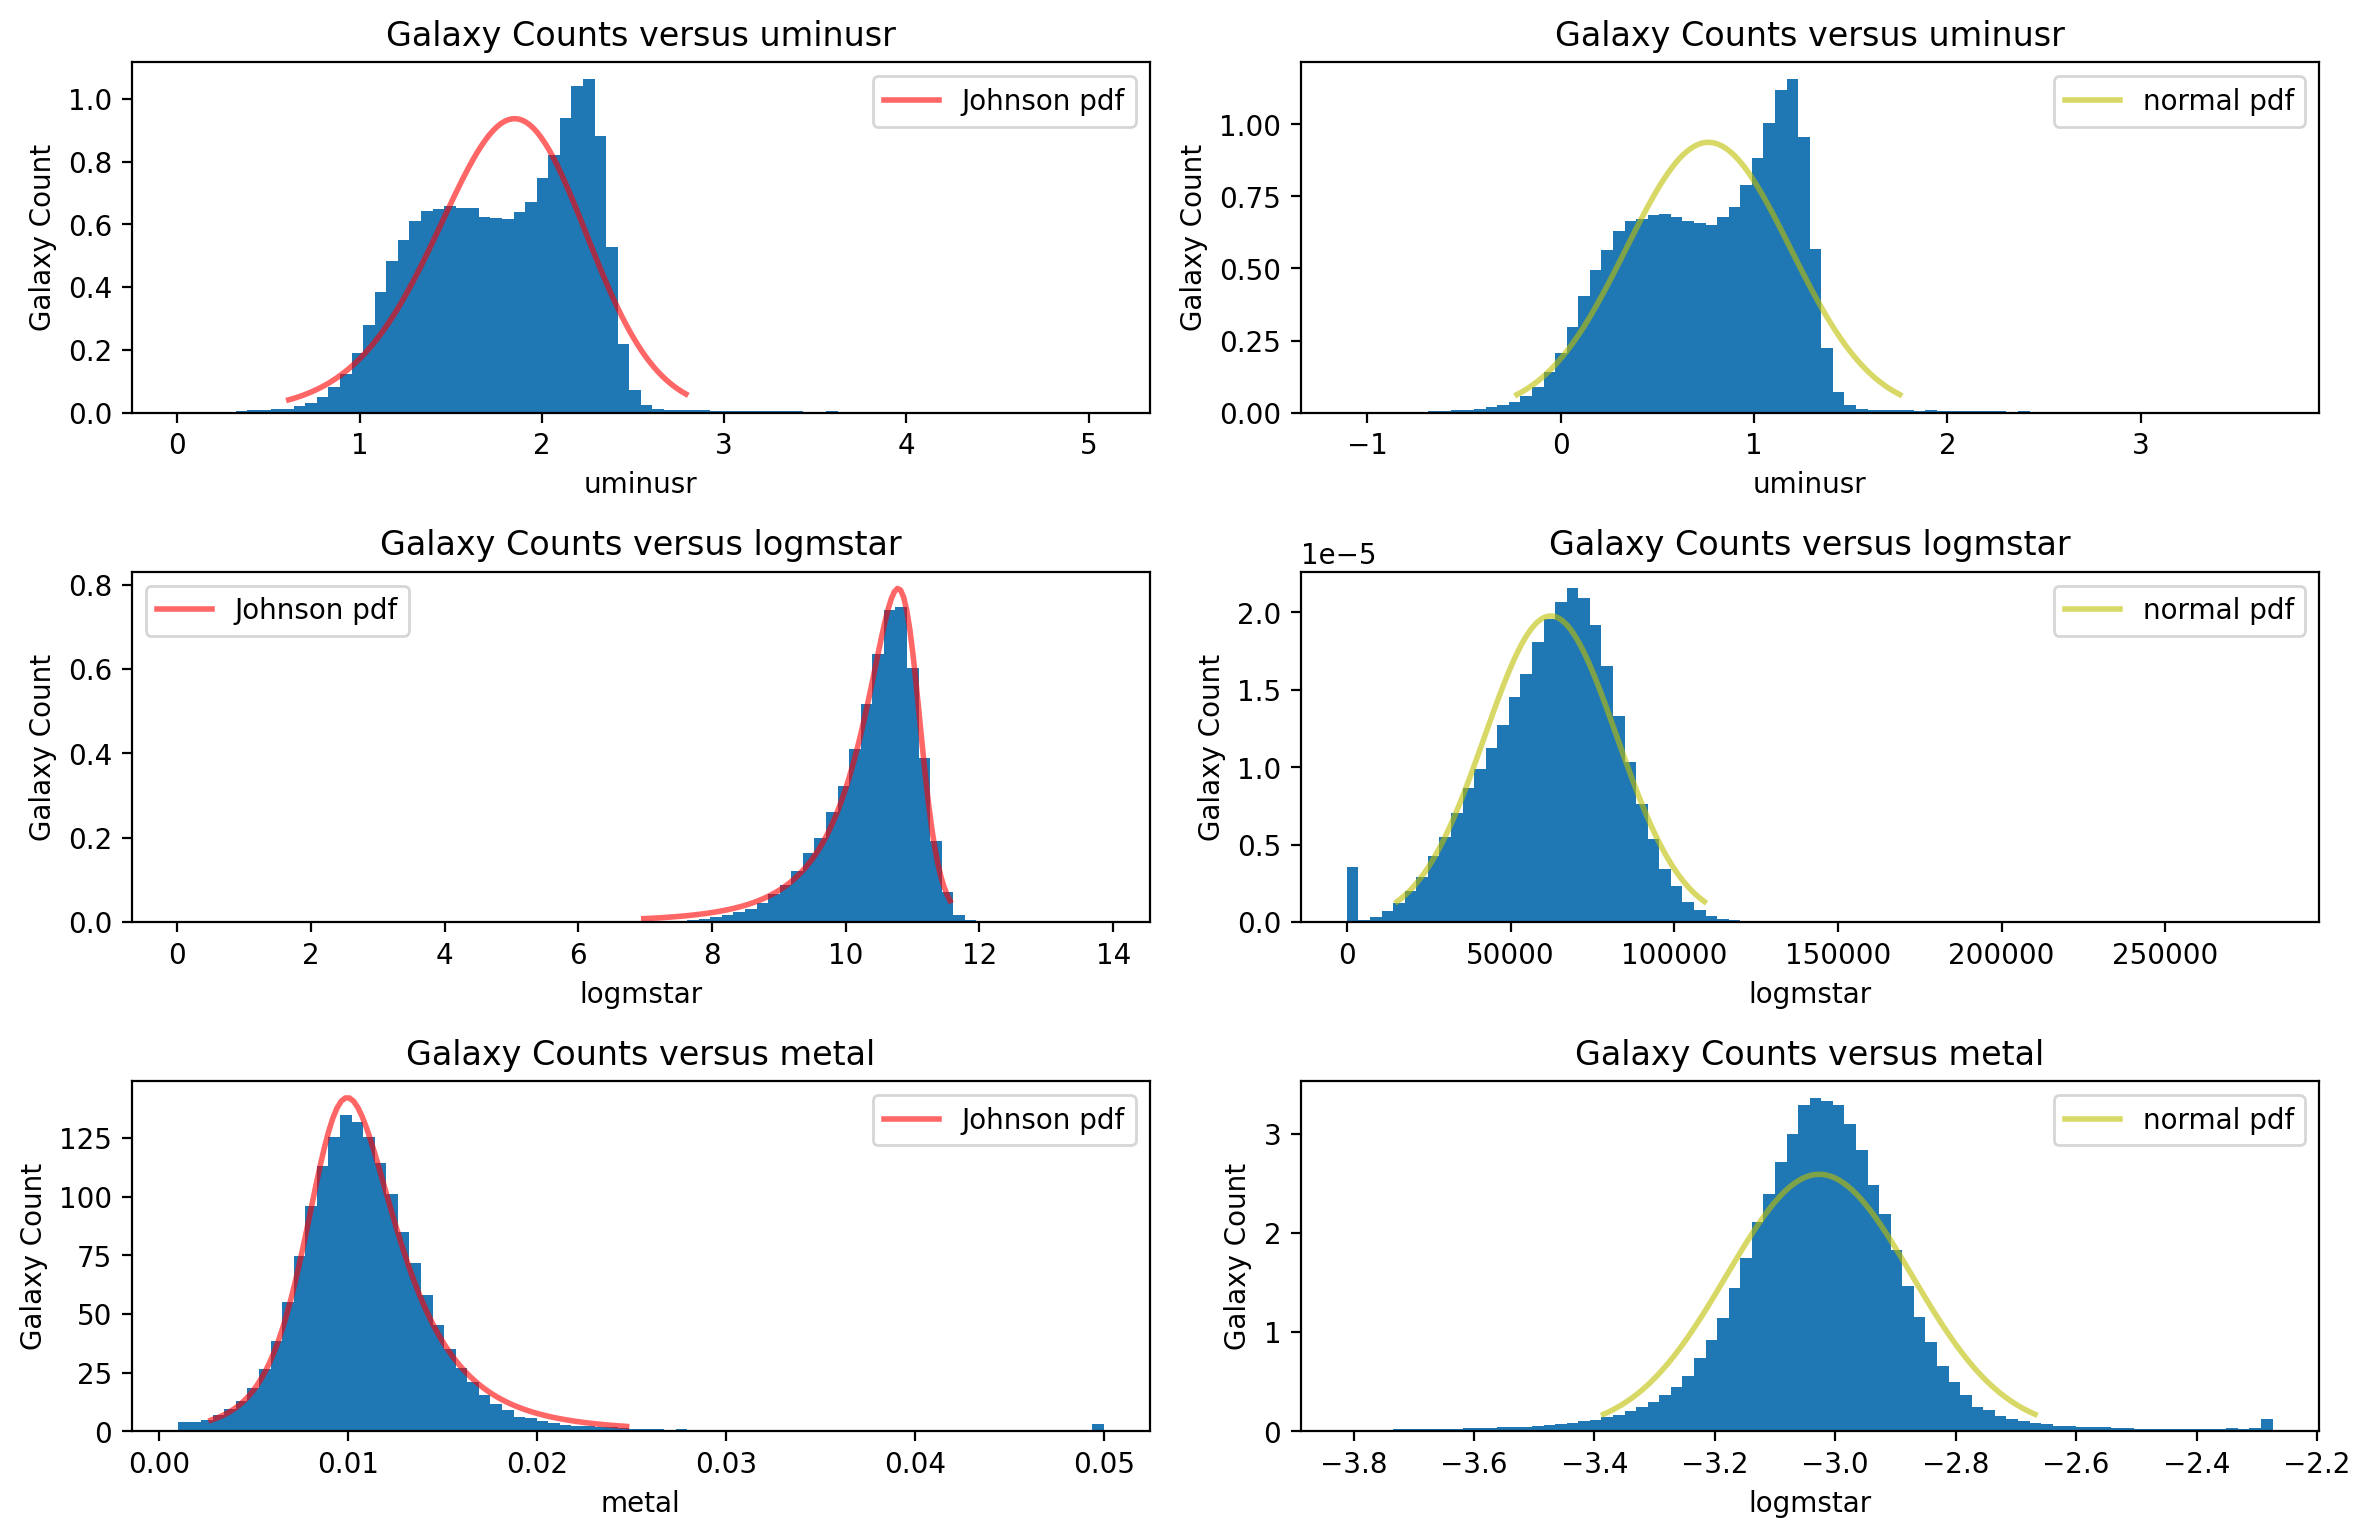

In [4]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy import stats

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
stellarMasses = Table.read('../../GAMA_Data/StellarMassesv19.fits')
RErange = stellarMasses

#RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
print(len(RErange))
#RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
#RErange = RErange[RErange['AGEDenParFlag'] == 0]
#RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['logmstar']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 15), dpi=200)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats

xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax1 = fig.add_subplot(6, 2, 1)
ax1.title.set_text('Galaxy Counts versus '+xfield)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
ax1.legend()         

ax2 = fig.add_subplot(6, 2, 2)
ax2.title.set_text('Galaxy Counts versus uminusr')
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None,alpha=0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
# y values for CoxBox
yn1 = xn**lamda-1/lamda
yn2 = (lamda / xn**lamda-1)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
#ax2.plot(xn,yn1,'r', label='Cox Box')
#ax2.plot(xn,yn2,'b', label='Cox Box Inverse')
ax2.hist(transdata, bins=binCount, density=True)
ax2.legend()
print("Need to print normal tests before & after")


xfield ='logmstar'
ax3 = fig.add_subplot(6, 2, 3)
ax3.title.set_text('Galaxy Counts versus '+xfield)
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(RErange[xfield].data, bins=binCount, density=True)
ax3.legend()

ax4 = fig.add_subplot(6, 2, 4)
ax4.title.set_text('Galaxy Counts versus '+xfield)
ax4.set_ylabel('Galaxy Count')
ax4.set_xlabel(xfield)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None,alpha=0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Inteval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax4.set_xlabel('logmstar')
ax4.legend()

xfield ='metal'
ax5 = fig.add_subplot(6, 2, 5)
ax5.title.set_text('Galaxy Counts versus '+xfield)
ax5.set_ylabel('Galaxy Count')
ax5.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax5.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax5.hist(RErange[xfield].data, bins=binCount, density=True)
ax5.legend()

ax6 = fig.add_subplot(6, 2, 6)
ax6.title.set_text('Galaxy Counts versus '+xfield)
ax6.set_ylabel('Galaxy Count')
ax6.set_xlabel(xfield)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha=0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidenc Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
ax6.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax6.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax6.set_xlabel('logmstar')
ax6.legend()

fig.tight_layout()
plt.show()




